<a href="https://colab.research.google.com/github/vadim-privalov/Neiroset_Novosibirsk/blob/main/%D0%9F%D0%BE%D1%80%D0%BE%D0%B3%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9E%D1%86%D1%83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пороговое значение Оцу

# Otsu threshold value


В этом уроке при помощи метода Оцу будем определять наилучшее пороговое значение

In this lesson we will use the Otsu method to determine the best threshold value


Пороговая обработка изображения используется для бинаризации изображения на основе интенсивности пикселей. Входом для такого алгоритма пороговой обработки обычно является полутоновое изображение и порог. На выходе получается бинарное изображение.

Thresholding is used to binarize an image based on pixel intensity. The input for this thresholding algorithm is usually a grayscale image and a threshold. The output is a binary image.

**Работает это следующим образом:** 

**This works as follows:** 

Если интенсивность пикселя на входном изображении больше порогового значения, соответствующий выходной пиксель помечается как белый (передний план), а если интенсивность входного пикселя меньше или равна пороговому значению, местоположение выходного пикселя помечается черным (фон).




If the pixel intensity in the input image is greater than the threshold value, the corresponding output pixel is marked white (foreground), and if the intensity of the input pixel is less than or equal to the threshold value, the location of the output pixel is marked black (background).

In [1]:
!wget http://dataudt.ru/datasets/cv/Lesson_19.Thresholding_otsu.zip
!unzip Lesson_19.Thresholding_otsu.zip
%cd /content/Lesson_19.Thresholding_otsu

--2022-02-01 18:37:10--  http://dataudt.ru/datasets/cv/Lesson_19.Thresholding_otsu.zip
Resolving dataudt.ru (dataudt.ru)... 37.228.117.130
Connecting to dataudt.ru (dataudt.ru)|37.228.117.130|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918871 (897K) [application/zip]
Saving to: ‘Lesson_19.Thresholding_otsu.zip’

Lesson_19.Threshold 100%[===================>] 897.33K  3.63MB/s    in 0.2s    

2022-02-01 18:37:10 (3.63 MB/s) - ‘Lesson_19.Thresholding_otsu.zip’ saved [918871/918871]

Archive:  Lesson_19.Thresholding_otsu.zip
  inflating: Lesson_19.Thresholding_otsu/coins_01.png  
  inflating: Lesson_19.Thresholding_otsu/coins_02.png  
  inflating: Lesson_19.Thresholding_otsu/coins_03.png  
  inflating: Lesson_19.Thresholding_otsu/Thresholding_otsu.py  
/content/Lesson_19.Thresholding_otsu


In [2]:
# импортируем необходимые модули
# import the necessary packages
import cv2
from google.colab.patches import cv2_imshow

In [3]:
# создадим отдельный словарь с аргументами 
# create a separate dictionary with arguments 

args = {
  # путь к входному изображению 
  # the path to the input image
  "image" : "coins_01.png"  
  
}

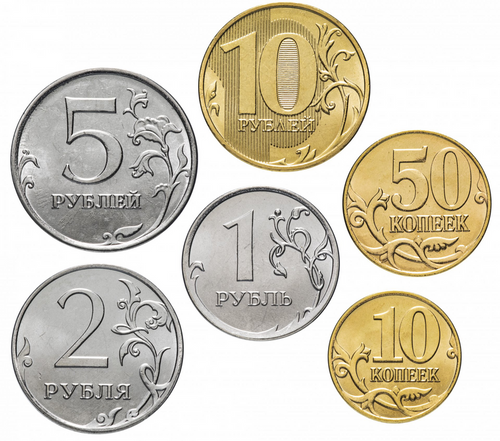

In [4]:
# загружаем изображение, конвертируем его 
# в градации серого и слегка размываем
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (7, 7), 0)
cv2_imshow(image)

Threshold


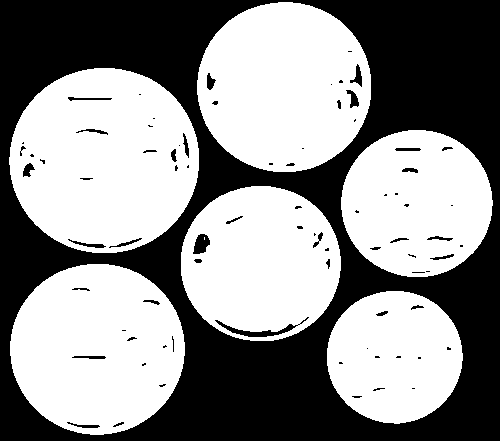

Otsu's thresholding value: 209.0


In [5]:
# применить автоматическое определение порога Оцу
# метод Оцу автоматически определяет для нас
# наилучшее пороговое значение `T`
# apply Otsu's automatic thresholding -- Otsu's method automatically
# determines the best threshold value `T` for us
(T, threshInv) = cv2.threshold(blurred, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print("Threshold")
cv2_imshow(threshInv)
print("Otsu's thresholding value: {}".format(T))

Output


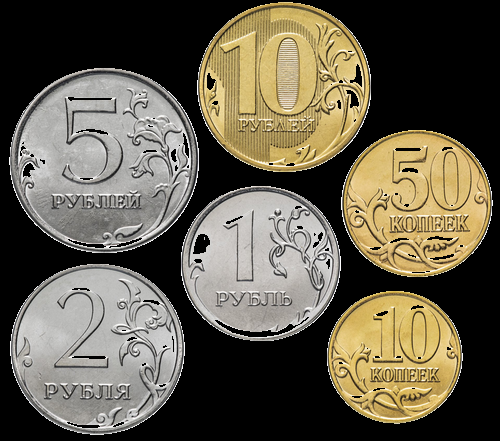

In [6]:
# наконец, мы можем визуализировать только 
# выделенные области изображения
# finally, we can visualize only the masked regions in the image
print('Output')
cv2_imshow(cv2.bitwise_and(image, image, mask=threshInv))